# Model de diffusion dans un canal étroit sans potentiel

Code origine : $\mathrm{\color{red}{Cumulant4\_fonction.py}}$ et  $\mathrm{\color{red}{DoubleRigidWallOverdampedBrownExp\_Cython.pyx}}$

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 14/01/2022


- $2H_p$ : hauteur du canal;
- $a$ : rayon de la particule;
- On pose $H = H_p -a$
- $\eta_0$ : viscosité du fluide
- $D_\|(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\| a}$ : coeficient de diffusion colinéaire au mur, avec $\eta_\| (z) = \eta_0 \left( 1 - \frac{9a}{16(z+a)} +  \left( \frac{a}{8(z+a)} \right)^3 - \left( \frac{45a}{256(z+a)} \right)^4 - \left( \frac{a}{16(z+a)} \right)^5 \right)^{-1}$. 
- $D_\perp(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\perp a}$ : coeficient de diffusion transverse au mur, avec $\eta_\perp(z) = \eta_0 \frac{6z^2 + 9az + 2a^2}{6z^2 + 2az}$.


Les viscosités effectives du fluide, transverse et colinaires, dû à la présence des deux mur s'écrivent : $\eta_\mathrm{eff} = \eta_\mathrm{B} + \eta_\mathrm{T} - \eta_0$, où le mur du bas est placé en $-H_\mathrm{P}$ et le mur du haut est en $+H_\mathrm{P}$. Les deux murs sont donc distant de $2 H_\mathrm{P}$.

La particule est soumise au poids et à la répulstion electronique des deux mur, donc le potentiel vaud :

\begin{equation}
    V = B k_\mathrm{B}T \left( \exp \left( -\frac{z_\mathrm{B}}{l_\mathrm{D}} \right) + \exp \left( -\frac{z_\mathrm{T}}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z = B k_\mathrm{B}T \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z.
\end{equation}
avec $z_\mathrm{B} = H+z$ la distance entre la particule (en $z$) et le mur du bas ; et $z_\mathrm{T} = H-z$, celle entre la particule et le mur du haut.

La force électrostatique vaud alors :
\begin{equation}
    F_\mathrm{elec} = -\frac{\partial V_\mathrm{elec}}{\partial z} = \frac{B k_\mathrm{B}T }{l_\mathrm{D}} e^{- \frac{H}{l_\mathrm{D}}} \left( \exp \left( -\frac{z}{l_\mathrm{D}} \right) - \exp \left( \frac{z}{l_\mathrm{D}} \right)  \right),
\end{equation}
et la force gravitaire :
\begin{equation}
    F_\mathrm{grav} = -\frac{k_\mathrm{B} T }{l_\mathrm{B}}.
\end{equation}

La PDF de $z$ s'écrit alors :
\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} \exp \left( -\frac{V}{k_\mathrm{B}T} \right) = \frac{1}{N} e^{ - B  \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) - \frac{z}{l_\mathrm{B}}},
\end{equation}

\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} e^{ - B \exp \left( -\frac{H}{l_\mathrm{D}} \right) \left \{ \exp \left( -\frac{z}{l_\mathrm{D}} \right) + \exp \left( +\frac{z}{l_\mathrm{D}} \right)  \right \} - \frac{z}{l_\mathrm{B}}}.
\end{equation}

Le spurious drift s'écrit :
\begin{equation}
    F_\mathrm{spurious} = k_\mathrm{B}T \frac{D_{\perp,\mathrm{eff}} '(z)}{D_{\perp,\mathrm{eff}}(z)} = D_{\perp,\mathrm{eff}} '(z) \gamma_{\perp,\mathrm{eff}}(z) = - \frac{k_\mathrm{B}T (\eta_\mathrm{B}'(z) + \eta_\mathrm{T}'(z))}{6 \pi a (\eta_\mathrm{B}(z) + \eta_\mathrm{T}(z) - \eta_0)^2} \gamma_{\perp,\mathrm{eff}}(z)
\end{equation}
avec :
\begin{equation}
    \eta_\mathrm{\begin{matrix} \mathrm{B}\\\mathrm{T} \end{matrix}}'(z) = \eta_0 \left( \frac{\mp 42a(H \pm z)^2 \mp 24 a^2(H \pm z) \mp 4a^3}{(6(H \pm z)^2 + 2a(H \pm z))^2} \right) 
\end{equation}


$\mathrm{B}=\mathrm{Bottom}$, $\mathrm{T}=\mathrm{Top}$

Équation de Langevin overdamped:
\begin{equation}
   \gamma_\mathrm{eff} (z) \frac{\mathrm{d}z}{\mathrm{d}t} = F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t}{\mathrm{d}t}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t} {\mathrm{d}t} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff}(z)}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff} (z)} - D_\mathrm{eff,\perp}' \mathrm{d}t  + w(z) \mathrm{RNG} \mathrm{d}t.
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Cumulant4_fonction import C4_long, C4_court, Cross_time
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D
from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm
# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")

In [2]:
import sys
sys.path.append(r"/home/e.millan/Documents/Stage2020-Nageurs-actifs-proche-de-parois-deformable/Results")
from Functions_Analysis import plot_traj, MSD, P_z_wall, P_Deltaz_longTime

In [3]:
dt = 1e-2
Nt = 1000000
a = 0.5e-6
H = 2e-6
Hs = 31.0e-6
lD = 100.0e-9 
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

kBT=1.38e-23*300
lB = kBT / (4/3 * np.pi * a**3 * (50)*9.81)
B=4.8
F_elec = lambda z: B * kBT/lD * np.exp(-H/lD) * (np.exp(-z/lD) - np.exp(z/lD))
F_grav = lambda z: - kBT/lB*np.ones(len(z))

P_eq = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)

def gamma_z_eff(zi_1, a, eta, H):
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    gam_z_2 = (
    6
    * np.pi
    * a
    * eta
    * (
        (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )
    gam_0 = 6 * np.pi * a * eta
    return gam_z + gam_z_2 - gam_0

gammaB_prime = lambda zi: 6*np.pi*eta*a * (-42*a*(H+zi)**2 - 24*a**2*(H+zi) - 4*a**2) / (6*(H+zi)**2 + 2*a*(H+zi))**2
gammaT_prime = lambda zi: 6*np.pi*eta*a * (+42*a*(H-zi)**2 + 24*a**2*(H-zi) + 4*a**2) / (6*(H-zi)**2 + 2*a*(H-zi))**2

D_prime = - kBT / (6* np.pi*eta*a) *(gammaB_prime(zz) + gammaT_prime(zz)) / gamma_z_eff(zz, a, eta, H)**2




Text(0.5, 1.0, 'Forces')

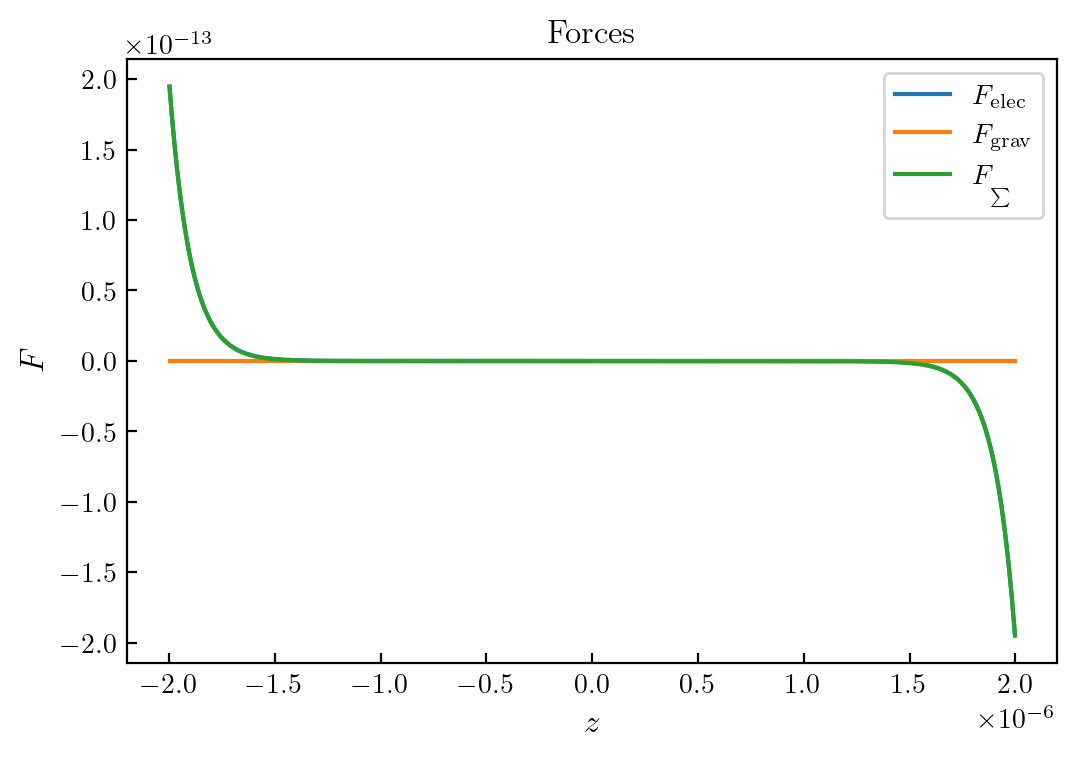

In [4]:
plt.plot(zz, F_elec(zz), label=r"$F_\mathrm{elec}$")
plt.plot(zz, F_grav(zz), label=r"$F_\mathrm{grav}$")
plt.plot(zz, F_elec(zz)+F_grav(zz), label=r"$F_\sum$")
plt.legend()
plt.xlabel(r"$z$")
plt.ylabel(r"$F$")
plt.title(r"Forces")


In [5]:
def eta_primes(z):
    e = a / (H-z)**2 - a / (H+z)**2 - (3*(8*a - 9))/(2*(a+3*H - 3*z)**2) + (3*(8*a - 9))/(2*(a+3*(H+z))**2)
    e = eta*e
    return e

def eta_eff(z):
    eta_B = eta * (6*(H+z)**2 + 9*(H+z) + 2*(H+z)**2) / (6*(H+z)**2 + 2*a*(H+z))
    eta_T = eta * (6*(H-z)**2 + 9*(H-z) + 2*(H-z)**2) / (6*(H-z)**2 + 2*a*(H-z))
    
    return eta_B + eta_T - eta
    
def D_prime_max(z):
    return  - kBT / (6*np.pi* a) * eta_primes(z) / eta_eff(z)**2

Text(0.5, 1.0, 'Spurious force')

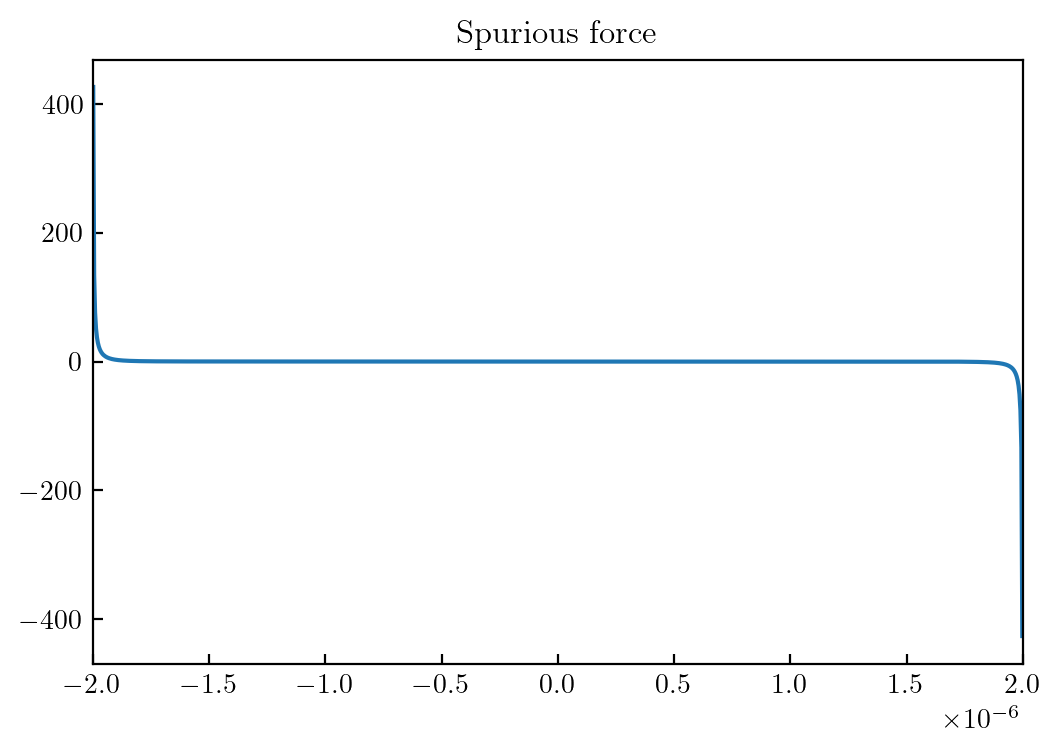

In [6]:
plt.plot(zz, D_prime* gamma_z_eff(zz, a, eta, H))

plt.axis([-H, H, None, None])
plt.title(r"Spurious force")

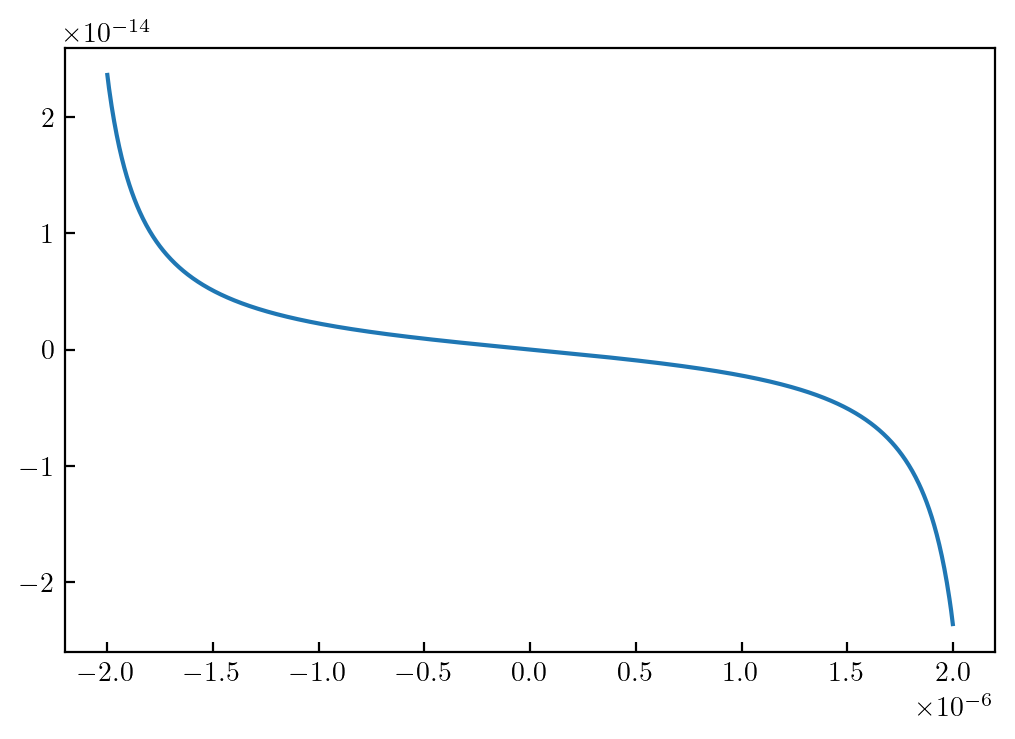

In [7]:
plt.plot(zz, D_prime_max(zz)* 6*np.pi*eta_eff(zz)*a)


Text(0.5, 1.0, '$F_\\mathrm{grav} + F_\\mathrm{elec} + F_\\mathrm{spurious}$')

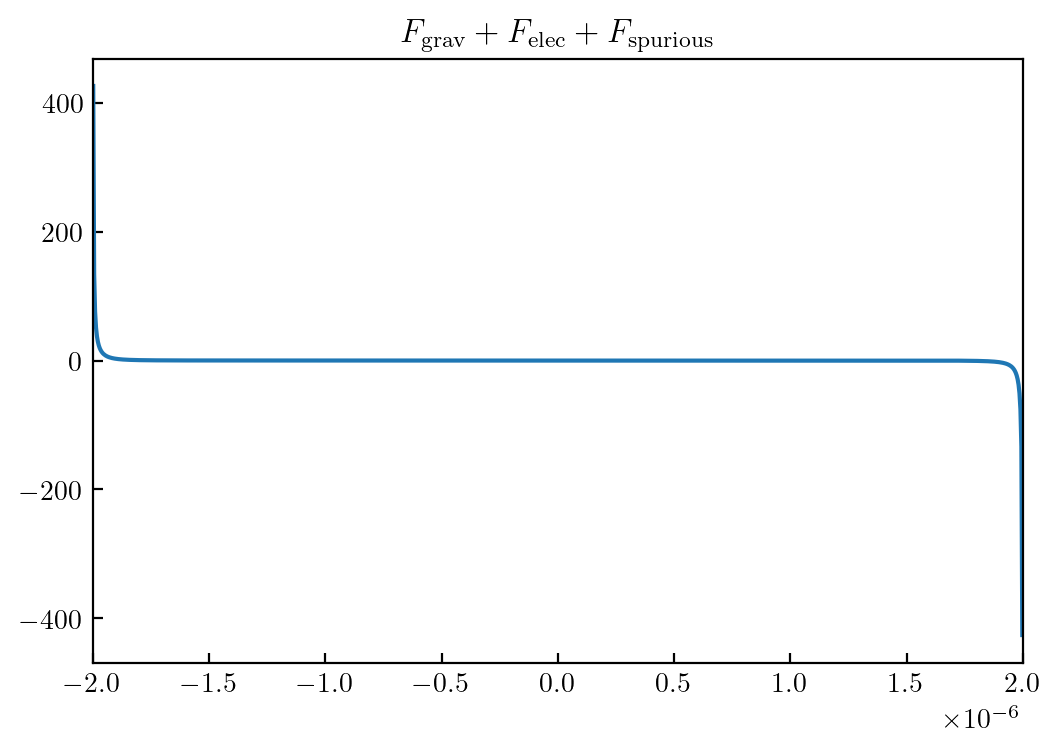

In [8]:
plt.plot(zz, D_prime*gamma_z_eff(zz, a, eta, H)+F_elec(zz)+F_grav(zz))
plt.axis([-H, H, None, None])
plt.title(r"$F_\mathrm{grav} + F_\mathrm{elec} + F_\mathrm{spurious}$")

Text(0.5, 1.0, '$P_\\mathrm{eq}(z)$ théorique')

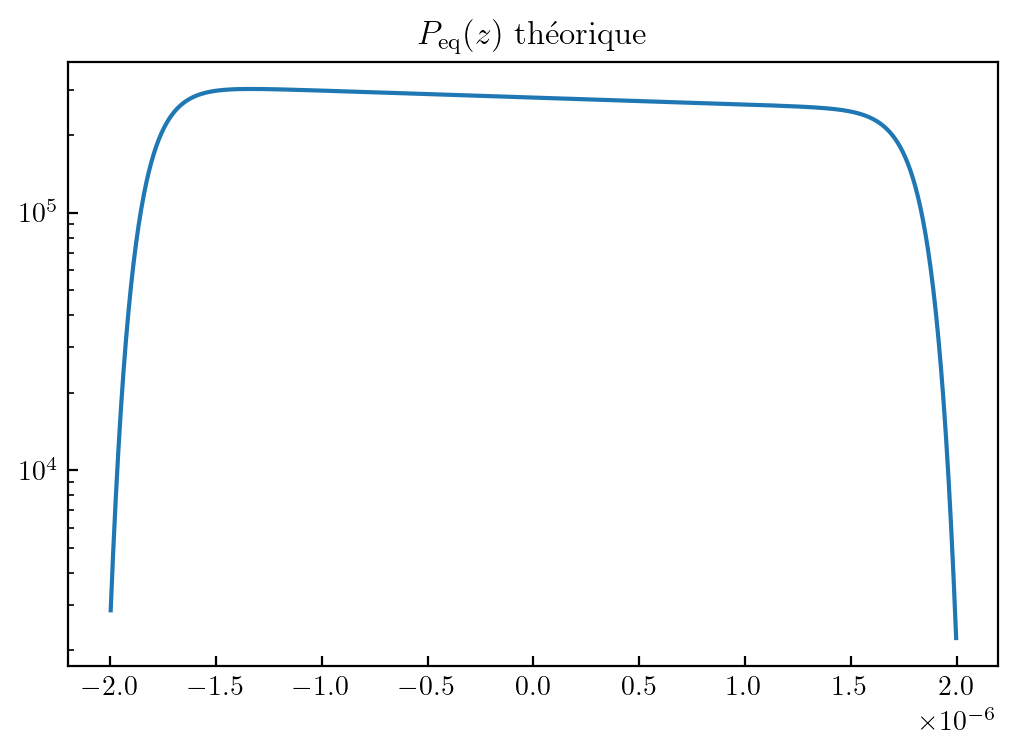

In [9]:
plt.semilogy(zz, P_eq(zz)/quad(P_eq, -H, H)[0])
# plt.xlim([-H, +H])
plt.title(r"$P_\mathrm{eq}(z)$ théorique")

## Simulation

In [10]:
# Simulation
simu = RigidWallOverdampedLangevin3D(dt=dt, Nt=Nt, a=a, H=H, lD=lD,)
simu.trajectory()

In [11]:
simu.z

array([-1.50000000e-06, -1.44381881e-06, -1.51228700e-06, ...,
        5.57308495e-07,  6.26459939e-07,  5.17652765e-07])

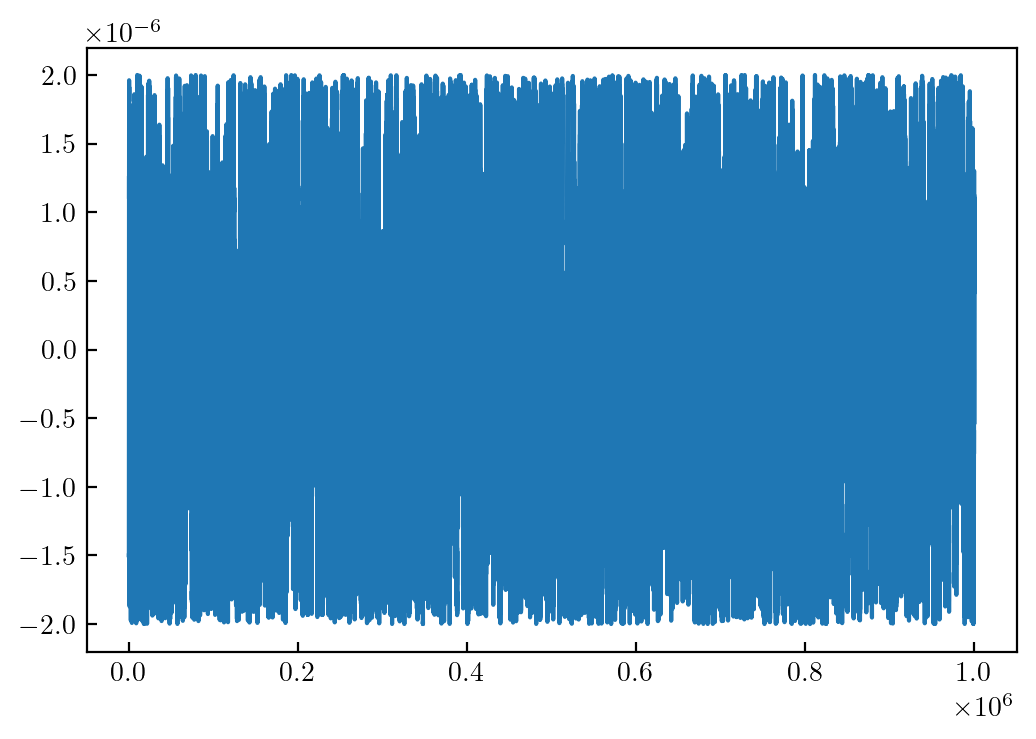

In [12]:
#plt.axis([None, None, -H, +H])
plt.plot(simu.z)


In [13]:
Rs = np.zeros([Nt, 3])
t = np.linspace(0, dt*Nt, Nt)

Rs[:,0] = simu.x
Rs[:,1] = simu.y
Rs[:,2] = simu.z

#plot_traj(t,Rs)

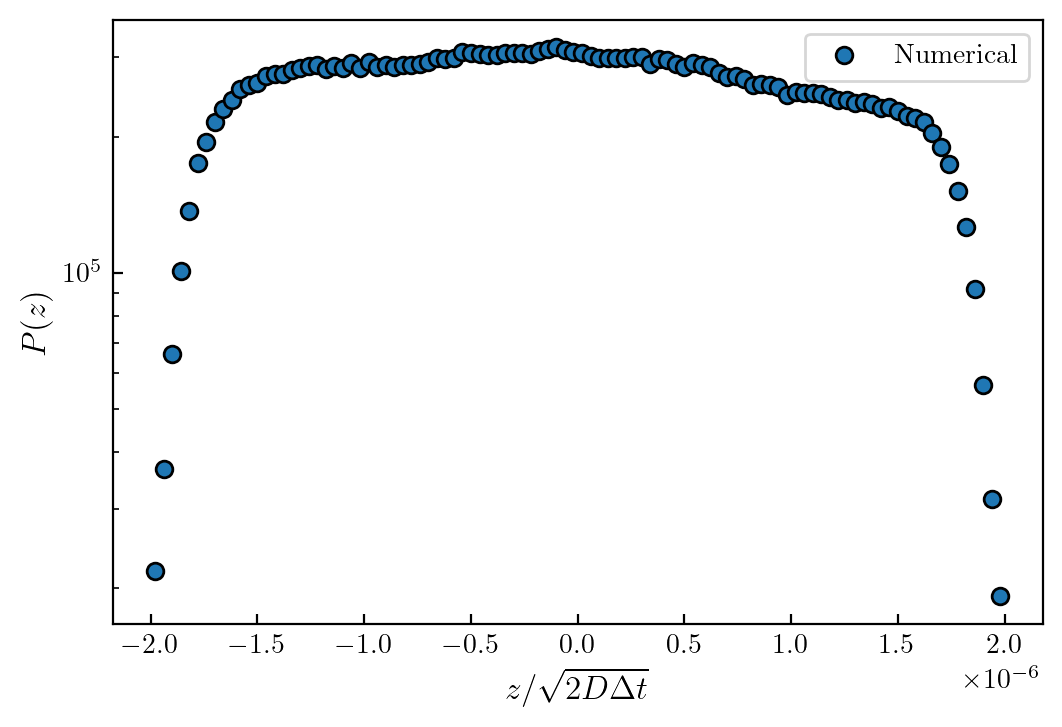

In [14]:
#plt.axis([-H, H, None, None])
simu.PDF("z", N_tau=10, space="wall", bins=100, plot=True)

In [15]:
X, Y = simu.PDF("z", N_tau=10, space="wall", bins=100, plot=False, output=True)

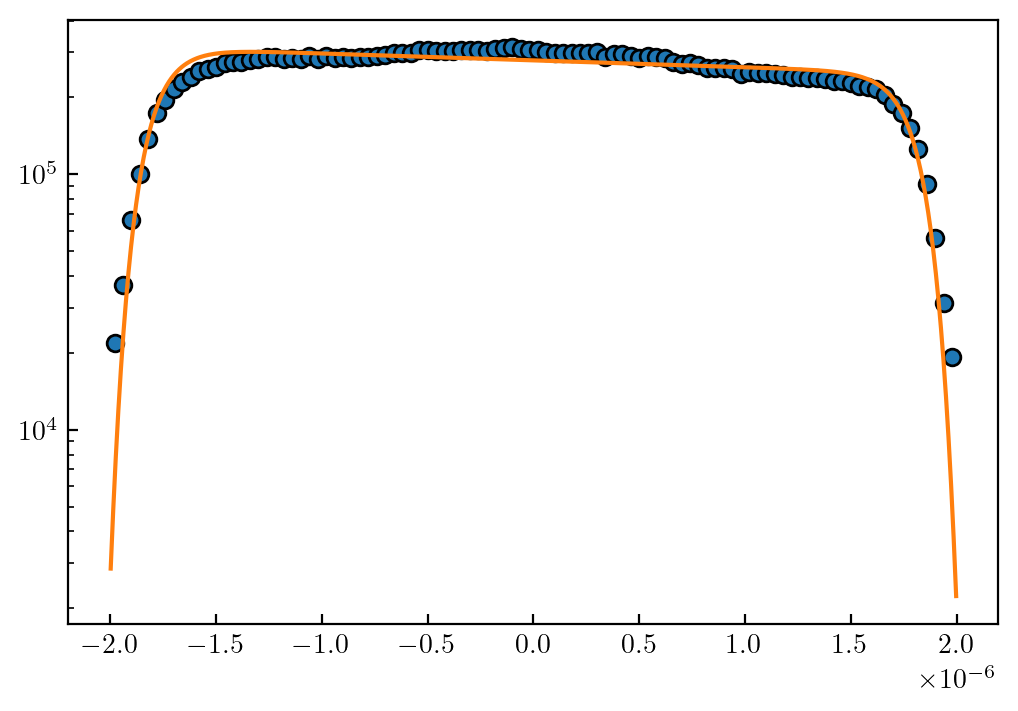

In [16]:
plt.plot(X,Y,"o")
plt.semilogy(zz, P_eq(zz)/quad(P_eq, -H, H)[0])


In [17]:
pdf_theo = simu.P_z_wall(zz) ## P_eq(z)
Peq_z = pdf_theo/np.trapz(pdf_theo, zz) ## Normalisation par N

""" 
    Sur l'axe Z
"""
def gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

Dz = (simu.kb*simu.T) / (gamma_z_eff(zz, a, eta, H)) 
mean_Dz_theo = np.trapz(Dz * Peq_z, zz)
print("<Dz>_theo/D_0 = {:.2f}".format(mean_Dz_theo/(kBT / simu.gamma)))

<Dz>_theo/D_0 = 0.54


In [18]:
list_dt_MSD = np.array([], dtype=int)
for i in range(len(str(Nt)) - 1):
    # Take just 10 points by decade.
    list_dt_MSD = np.concatenate(
        (
            list_dt_MSD,
            np.arange(10 ** i, 10 ** (i + 1), 10 ** i, dtype=int),
        )
    )

In [19]:
position = simu.z

NumberOfMSDPoint = len(list_dt_MSD)
msd = np.zeros(NumberOfMSDPoint)
for k, i in enumerate(tqdm(list_dt_MSD)):
    if i == 0:
        msd[k] = 0
        continue
    msd[k] = np.mean((position[i:]-position[:-i])**2)

100%|██████████████████████████████████████████| 54/54 [00:00<00:00, 494.29it/s]


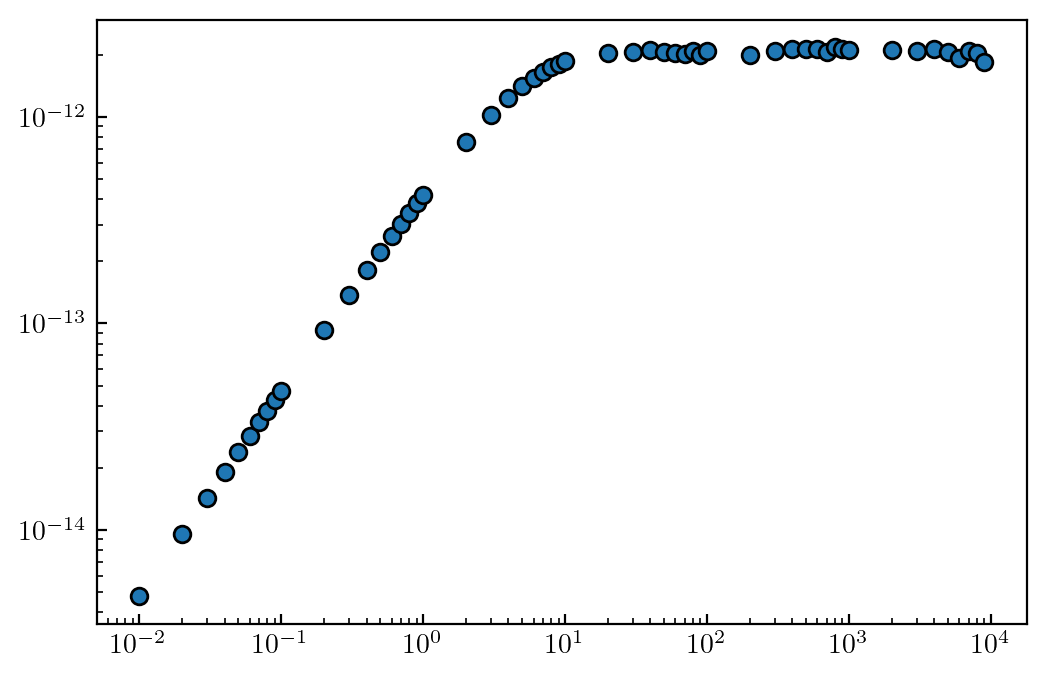

In [20]:
plt.loglog(t[list_dt_MSD], msd, "o", label="Numerical")

1000000


100%|██████████████████████████████████████████| 54/54 [00:00<00:00, 381.83it/s]


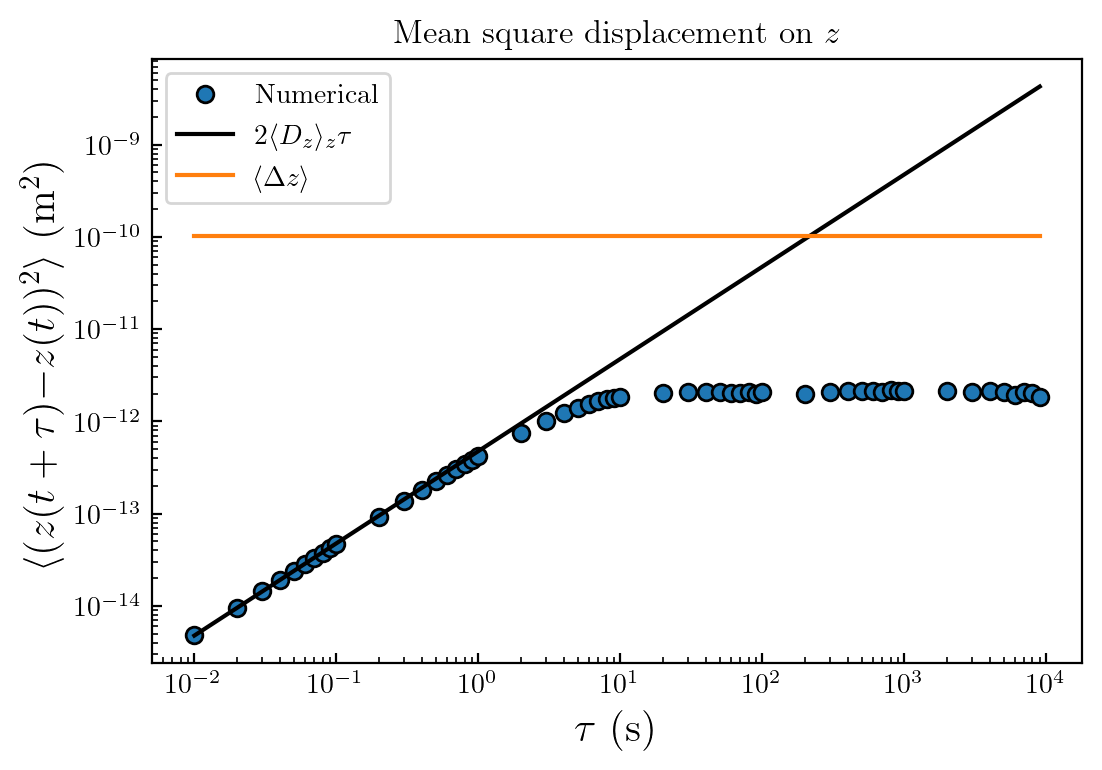

In [21]:
MSD("z", Rs, dt, Nt, D_mean=mean_Dz_theo, lD=lD, lB=lB, space="wall")

In [22]:
Nt

1000000

In [23]:
pi = np.pi
zz = np.linspace(-H, H, 1000)


In [24]:
plt.plot(zz, gamma_z(zz, a, eta))

NameError: name 'gamma_z' is not defined